# Лаба НЛП

## Обработка данных

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import string
import warnings

In [135]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [136]:
data = pd.read_csv('/content/drive/MyDrive/DataSets/spam.csv', encoding='latin-1')

In [137]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [138]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [140]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [141]:
data=data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [142]:
data=data.rename({'v1':'Type','v2':'Message'},axis=1)

In [143]:
data.head()

,Type,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


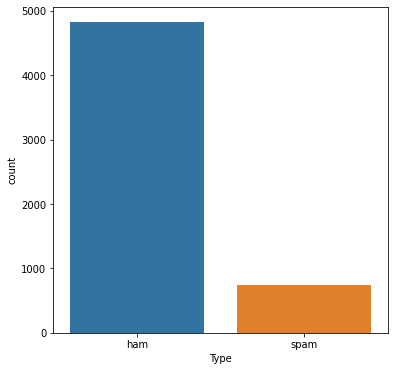

In [144]:
plt.figure(figsize=(6,6))

x= data.Type.value_counts()
sns.countplot(x= "Type",data= data)

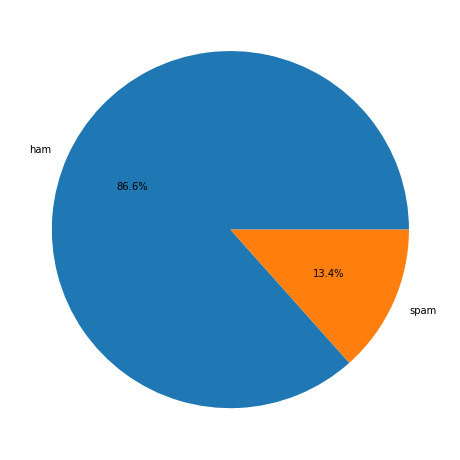

In [145]:
plt.figure(figsize=(8,12))

label= ["ham","spam"]

plt.pie(x.values, labels= label ,autopct= "%1.1f%%")
plt.show()  

In [146]:
pip install contractions

In [147]:
import re
import contractions
import collections
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Токенизация и разделение данных на тестовые и тренеровочные

1) Преобразование сокращений в полную форму ("I'm" to "I am")

2) Нижний регистр смс

3) Замена ссылок на url, чтобы факт наличие ссылки в сообшение остался, но уникаильных ссылок не было

4) Удаление символов и цифр

5) Лемматизация и удаление стоп-слов


In [148]:
nltk.download('wordnet')
lem = WordNetLemmatizer()
def preprocessing(data):
      sms = contractions.fix(data)
      sms = sms.lower()
      sms = re.sub(r'https?://S+|www.S+', "url", sms).strip()
      sms = re.sub("[^a-z ]", "", sms)
      sms = sms.split()
      sms = [lem.lemmatize(word) for word in sms if not word in set(stopwords.words("english"))]
      sms = " ".join(sms)
      return sms
X = data["Message"].apply(preprocessing)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [149]:
def word_count_plot(data):
     word_counter = collections.Counter([word for sentence in data for word in sentence.split()])
     most_count = word_counter.most_common(50) # 30 most common words
     most_count = pd.DataFrame(most_count, columns=["Word", "Count"]).sort_values(by="Count")
     most_count.plot.barh(x = "Word", y = "Count", color="green", figsize=(10, 15))

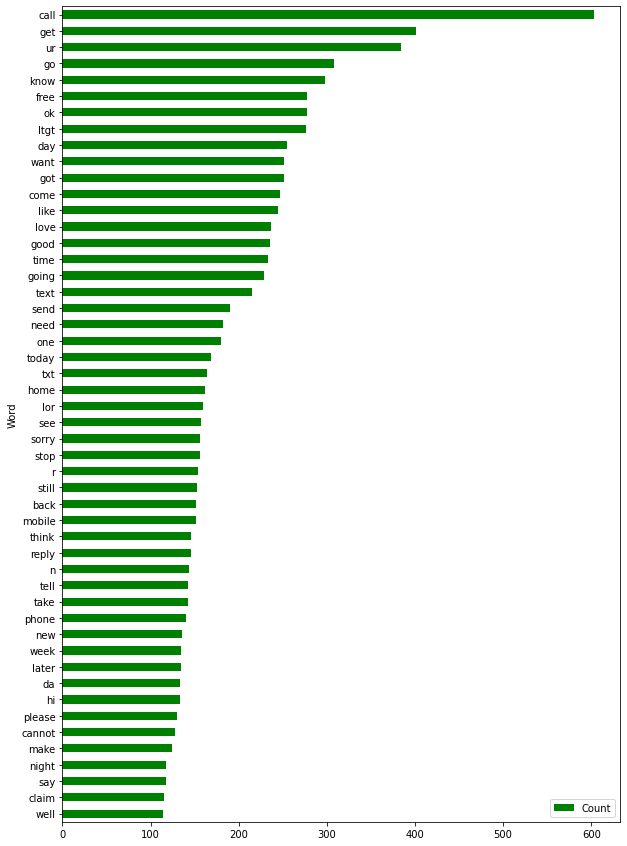

In [150]:
word_count_plot(X)

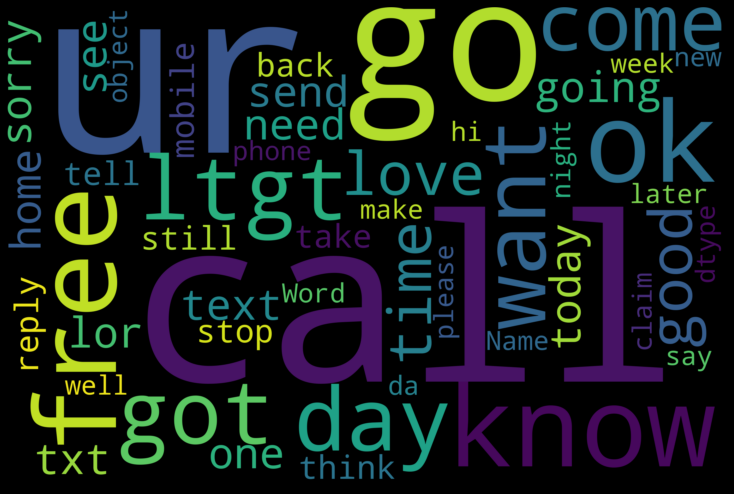

In [151]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

word_counter = collections.Counter([word for sentence in X for word in sentence.split()])
most_count = word_counter.most_common(50)
most_count = pd.DataFrame(most_count, columns=["Word", "Count"]).sort_values(by="Count", ascending=0)

wordcloud = WordCloud(width = 3000, height = 2000, background_color = 'black').generate(str(most_count["Word"]))

fig = plt.figure(
    figsize = (10, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Вывел часто встречающиеся слова двуми способами, понятным, но не красивым и красивым, но не очень понятным. Очень много сокращений типо 'u'(you). Что негативно скажется на моделях.

In [152]:
import keras
from keras.layers import Dense, Embedding, LSTM, Dropout
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

Токенизируем слова

In [153]:
lb_enc = LabelEncoder()
y = lb_enc.fit_transform(data["Type"])

In [154]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
text_to_sequence = tokenizer.texts_to_sequences(X)

In [155]:
 for i in range(5):
           print("Text               : ",X[i] )
           print("Numerical Sequence : ", text_to_sequence[i])

Text               :  go jurong point crazy available bugis n great world la e buffet cine got amore wat
Numerical Sequence :  [4, 3591, 255, 555, 528, 1032, 35, 55, 236, 849, 82, 2423, 1033, 10, 3592, 69]
Text               :  ok lar joking wif oni
Numerical Sequence :  [7, 220, 1178, 330, 1545]
Text               :  free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs apply over
Numerical Sequence :  [6, 344, 588, 727, 94, 1546, 850, 482, 1547, 148, 177, 18, 1546, 221, 344, 2424, 23, 2425, 264, 2426]
Text               :  dun say early hor c already say
Numerical Sequence :  [144, 47, 256, 2427, 68, 76, 47]
Text               :  nah think go usf life around though
Numerical Sequence :  [777, 33, 4, 728, 89, 123, 345]


In [156]:
# словарь (индекс : слов)
tokenizer.index_word

{1: 'call',
 2: 'get',
 3: 'ur',
 4: 'go',
 5: 'know',
 6: 'free',
 7: 'ok',
 8: 'ltgt',
 9: 'day',
 10: 'got',
 11: 'want',
 12: 'come',
 13: 'like',
 14: 'love',
 15: 'good',
 16: 'time',
 17: 'going',
 18: 'text',
 19: 'send',
 20: 'need',
 21: 'one',
 22: 'today',
 23: 'txt',
 24: 'home',
 25: 'lor',
 26: 'see',
 27: 'sorry',
 28: 'stop',
 29: 'r',
 30: 'still',
 31: 'back',
 32: 'mobile',
 33: 'think',
 34: 'reply',
 35: 'n',
 36: 'take',
 37: 'tell',
 38: 'phone',
 39: 'new',
 40: 'week',
 41: 'later',
 42: 'da',
 43: 'hi',
 44: 'please',
 45: 'cannot',
 46: 'make',
 47: 'say',
 48: 'night',
 49: 'claim',
 50: 'well',
 51: 'thing',
 52: 'much',
 53: 'dear',
 54: 'oh',
 55: 'great',
 56: 'hey',
 57: 'pls',
 58: 'would',
 59: 'give',
 60: 'number',
 61: 'happy',
 62: 'friend',
 63: 'work',
 64: 'hope',
 65: 'message',
 66: 'u',
 67: 'way',
 68: 'c',
 69: 'wat',
 70: 'msg',
 71: 'prize',
 72: 'right',
 73: 'yes',
 74: 'let',
 75: 'min',
 76: 'already',
 77: 'tomorrow',
 78: 'ask',
 

In [157]:
# находим длину наибольшей последовательности
max_length_sequence = max([len(i) for i in text_to_sequence])
padded_sms_sequence = pad_sequences(text_to_sequence, maxlen=max_length_sequence, 
                                    padding = "pre") 
padded_sms_sequence

array([[   0,    0,    0, ...,   10, 3592,   69],
       [   0,    0,    0, ..., 1178,  330, 1545],
       [   0,    0,    0, ..., 2425,  264, 2426],
       ...,
       [   0,    0,    0, ..., 1028, 7833, 3589],
       [   0,    0,    0, ...,  792,   66,    6],
       [   0,    0,    0, ..., 2158,  367,  146]], dtype=int32)

In [158]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(padded_sms_sequence, y,test_size=0.25,random_state=0)

## Модели

### Многослойный Перцептрон

Дропоуты убрал, потому что с ними плохо работала модель

In [175]:
model_1 = keras.models.Sequential()
model_1.add(keras.layers.core.Dense(512, input_dim=79, activation='relu'))
model_1.add(keras.layers.core.Dense(256, activation='relu'))
model_1.add(keras.layers.core.Dense(128, activation='relu'))
model_1.add(keras.layers.core.Dense(64, activation='relu'))
model_1.add(keras.layers.core.Dense(1,   activation='sigmoid'))

model_1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [176]:
model_1.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 512)               40960     
                                                                 
 dense_45 (Dense)            (None, 256)               131328    
                                                                 
 dense_46 (Dense)            (None, 128)               32896     
                                                                 
 dense_47 (Dense)            (None, 64)                8256      
                                                                 
 dense_48 (Dense)            (None, 1)                 65        
                                                                 
Total params: 213,505
Trainable params: 213,505
Non-trainable params: 0
_________________________________________________________________


In [177]:
history = model_1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=32)

Epoch 1/20
131/131 [==============================] - 2s 8ms/step - loss: 5.5739 - accuracy: 0.8062 - val_loss: 1.5464 - val_accuracy: 0.8313
Epoch 2/20
131/131 [==============================] - 1s 6ms/step - loss: 1.0490 - accuracy: 0.8440 - val_loss: 0.7889 - val_accuracy: 0.8478
Epoch 3/20
131/131 [==============================] - 1s 7ms/step - loss: 0.5569 - accuracy: 0.8655 - val_loss: 0.7167 - val_accuracy: 0.8227
Epoch 4/20
131/131 [==============================] - 1s 7ms/step - loss: 0.5135 - accuracy: 0.8696 - val_loss: 0.6371 - val_accuracy: 0.8464
Epoch 5/20
131/131 [==============================] - 1s 6ms/step - loss: 0.4472 - accuracy: 0.8796 - val_loss: 0.6220 - val_accuracy: 0.8076
Epoch 6/20
131/131 [==============================] - 1s 6ms/step - loss: 0.3862 - accuracy: 0.8847 - val_loss: 0.5559 - val_accuracy: 0.8579
Epoch 7/20
131/131 [==============================] - 1s 7ms/step - loss: 0.3940 - accuracy: 0.8765 - val_loss: 0.6229 - val_accuracy: 0.8593
Epoch 

In [178]:
print(model_1.evaluate(x_test,y_test, verbose=1))

44/44 [==============================] - 0s 2ms/step - loss: 0.5694 - accuracy: 0.8650
[0.5694186091423035, 0.8650394678115845]


In [179]:
y_predicted = model_1.predict(x_test)
y_predicted_labels = [np.round(i) for i in y_predicted]

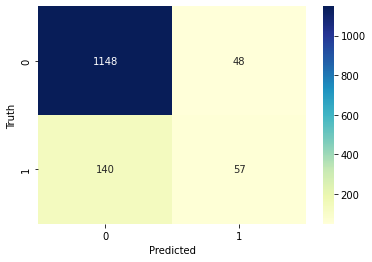

In [180]:
import tensorflow as tf
sns.heatmap(tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels), annot=True, fmt='d',cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [181]:
def plot_model(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(acc) + 1)

  plt.figure(figsize=(15,5))
  plt.subplot(1, 2, 1)
  plt.title('Training and validation accuracy')
  plt.plot(epochs, acc, 'red', label='Training acc')
  plt.plot(epochs, val_acc, 'blue', label='Validation acc')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.title('Training and validation loss')
  plt.plot(epochs, loss, 'red', label='Training loss')
  plt.plot(epochs, val_loss, 'blue', label='Validation loss')

  plt.legend()

  plt.show()

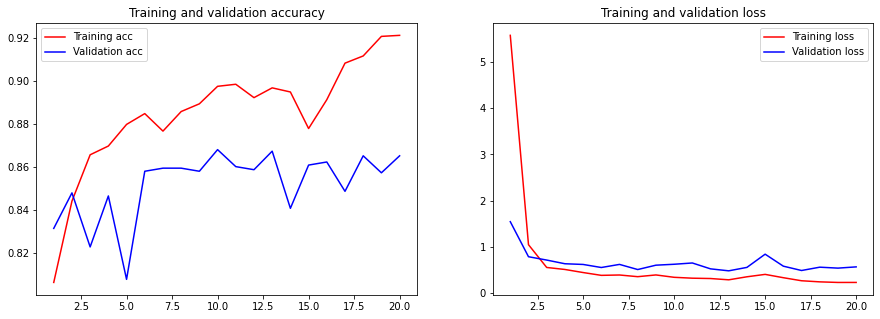

In [182]:
plot_model(history)

В целом результат получился неплохой. Возможно небольшое переобучение, потому что график валидации вырос очень слабо в сравнение с тренировочными результатами.

### Bi-directional LSTM

In [167]:
model_2 = keras.Sequential()
model_2.add(keras.layers.Embedding(9558, 30, input_length=79))
model_2.add(keras.layers.Bidirectional(keras.layers.LSTM(units=128)))
model_2.add(keras.layers.Dense(1,activation='sigmoid'))

In [168]:
model_2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model_2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 79, 30)            286740    
                                                                 
 bidirectional_4 (Bidirectio  (None, 256)              162816    
 nal)                                                            
                                                                 
 dense_39 (Dense)            (None, 1)                 257       
                                                                 
Total params: 449,813
Trainable params: 449,813
Non-trainable params: 0
_________________________________________________________________


In [169]:
history_2 = model_2.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.3,verbose=1)

Epoch 1/5
92/92 [==============================] - 75s 183ms/step - loss: 0.4158 - accuracy: 0.8697 - val_loss: 0.3506 - val_accuracy: 0.8708
Epoch 2/5
92/92 [==============================] - 16s 170ms/step - loss: 0.1578 - accuracy: 0.9450 - val_loss: 0.0692 - val_accuracy: 0.9825
Epoch 3/5
92/92 [==============================] - 16s 169ms/step - loss: 0.0501 - accuracy: 0.9870 - val_loss: 0.0482 - val_accuracy: 0.9872
Epoch 4/5
92/92 [==============================] - 16s 170ms/step - loss: 0.0239 - accuracy: 0.9932 - val_loss: 0.0485 - val_accuracy: 0.9848
Epoch 5/5
92/92 [==============================] - 16s 170ms/step - loss: 0.0123 - accuracy: 0.9969 - val_loss: 0.0476 - val_accuracy: 0.9848


In [170]:
print(model_2.evaluate(x_test,y_test, verbose=1))

44/44 [==============================] - 2s 36ms/step - loss: 0.0538 - accuracy: 0.9842
[0.05379476398229599, 0.9842067360877991]


In [171]:
y_predicted = model_2.predict(x_test)
y_predicted_labels = [np.round(i) for i in y_predicted]

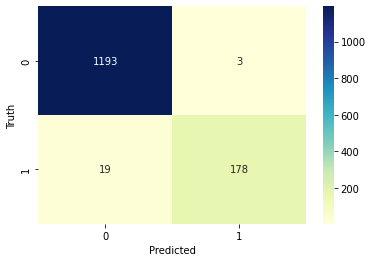

In [172]:
sns.heatmap(tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels), annot=True, fmt='d',cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

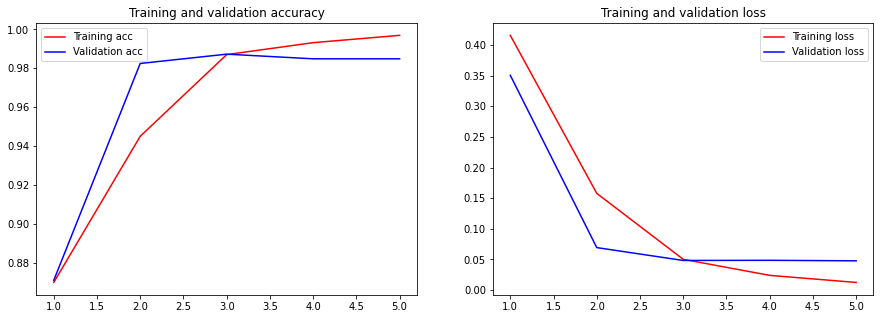

In [173]:
plot_model(history_2)

Результат получился хорошим 98%. Также на хитмапе видно, что ошибок обоих типов достаточно мало.